<a href="https://colab.research.google.com/github/jproctor-rebecca/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Confidence_Intervals_Assignment_RJProctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.util.testing as tm
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns
from numpy.random import RandomState



In [1]:
!wget https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv


--2020-07-15 18:59:40--  https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2499384 (2.4M) [text/plain]
Saving to: ‘bootcampers.csv’

bootcampers.csv     100%[===================>]   2.38M  8.01MB/s    in 0.3s    

2020-07-15 18:59:40 (8.01 MB/s) - ‘bootcampers.csv’ saved [2499384/2499384]



In [56]:
bootcampers = pd.read_csv('bootcampers.csv')

print(bootcampers.shape)

(2761, 15)


In [6]:
bootcampers.describe()

,Unnamed: 0,ConvertedSalary
count,2761.000000,2761.000000
mean,41208.962332,73453.404201
std,23947.027421,57710.453235
min,62.000000,0.000000
25%,20096.000000,32628.000000
50%,40573.000000,65340.000000
75%,62085.000000,100000.000000
max,87131.000000,499344.000000


In [7]:
bootcampers.isnull().sum()

Unnamed: 0            0
Student               0
Employment            0
UndergradMajor        0
DevType               0
YearsCoding           0
YearsCodingProf       0
ConvertedSalary       0
EducationTypes        0
SelfTaughtTypes       0
TimeAfterBootcamp     0
LanguageWorkedWith    0
Gender                0
Age                   0
RaceEthnicity         0
dtype: int64

In [8]:
bootcampers.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [77]:
# bootcampers_means_small = []
# bootcampers_means_large = []

size_small = 20
size_large = 200
r_s = 42
size_population = 2761

In [78]:
# sample mean to build a confidence interval around:
bootcampers_small = bootcampers.sample(size_small, random_state=r_s)

bootcampers_small.head()

#for x in range(0, size_population):
 # bootcampers_small = np.random.binomial(n=1, p=.5, size=size_small)
    # one_small_sample = bootcampers_small
 # bootcampers_means_small.append(bootcampers_small.mean().RandomState(42)
 
#for x in range(0, size_population):
 # bootcampers_large = np.random.binomial(n=1, p=.5, size=size_large)
    # one_large_sample = bootcampers_large
 # bootcampers_means_large.append(bootcampers_large.mean().RandomState(42)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,11175,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
1330,39067,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;DevOps specialist;Front-end...,3-5 years,3-5 years,86120.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,25 - 34 years old,White or of European descent
2750,86288,No,"Not employed, but looking for work","A social science (ex. anthropology, psychology...",Front-end developer;Full-stack developer,3-5 years,3-5 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Longer than a year,CoffeeScript;JavaScript;PHP;Python;SQL;TypeScr...,Male,25 - 34 years old,White or of European descent
521,15370,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,6-8 years,25047.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Four to six months,C#;Java;JavaScript;PHP;SQL;HTML;CSS,Male,25 - 34 years old,East Asian;Middle Eastern


In [81]:
print(bootcampers_small.shape)

(20, 15)


In [79]:
bootcampers_large = bootcampers.sample(size_large, random_state=r_s)

bootcampers_large.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,11175,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
1330,39067,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;DevOps specialist;Front-end...,3-5 years,3-5 years,86120.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,25 - 34 years old,White or of European descent
2750,86288,No,"Not employed, but looking for work","A social science (ex. anthropology, psychology...",Front-end developer;Full-stack developer,3-5 years,3-5 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Longer than a year,CoffeeScript;JavaScript;PHP;Python;SQL;TypeScr...,Male,25 - 34 years old,White or of European descent
521,15370,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,6-8 years,25047.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Four to six months,C#;Java;JavaScript;PHP;SQL;HTML;CSS,Male,25 - 34 years old,East Asian;Middle Eastern


In [82]:
print(bootcampers_large.shape)

(200, 15)


**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [83]:
cs_mean_small = bootcampers_small['ConvertedSalary'].mean()

print(cs_mean_small)

55752.2


In [84]:
cs_mean_large = bootcampers_large['ConvertedSalary'].mean()

print(cs_mean_large)

68551.255


In [85]:
# by default np.std() calculates the POPULATION standard deviation, 
# and not the SAMPLE standard deviation

print("Population Standard Deviation", np.std(bootcampers_small['ConvertedSalary'], ddof=0))


# If I want the sample standard deviation:
print("Sample Standard Deviation-Small", np.std(bootcampers_small['ConvertedSalary'], ddof=1))

Population Standard Deviation 41541.50996846407
Sample Standard Deviation-Small 42620.68994057377


In [86]:
# by default np.std() calculates the POPULATION standard deviation, 
# and not the SAMPLE standard deviation

print("Population Standard Deviation", np.std(bootcampers_large['ConvertedSalary'], ddof=0))


# If I want the sample standard deviation:
print("Sample Standard Deviation-Large", np.std(bootcampers_large['ConvertedSalary'], ddof=1))

Population Standard Deviation 56930.348151930135
Sample Standard Deviation-Large 57073.2099779389


In [89]:
# code combined to return sample mean, CI, and moe

def confidence_interval(bootcampers_small, confidence_level=.95):
  
  # Turn this into a numpy array for consistency
  data = np.array(bootcampers_small)
  
  # Sample Standard Deviation (ddof=1) with numpy to get sample metrics
  s = np.std(data, ddof=1)
  n = data.shape[0]
  x_bar = np.mean(data)
  
  # Look up the t statistic that corresponds to our sample size *and* confidence level
  t = stats.t.ppf(1 - ((1 - confidence_level) / 2), n-1)
  # Standard Error
  std_err = (s / np.sqrt(n))
  # Margin of Error
  moe = t*std_err

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  return (lower_bound, x_bar, upper_bound, moe)

In [90]:
# random sample of size 20
# with 95% confidence, the true population value is within
# the upper and lower bounds of the Confidence Interval

confidence_interval(bootcampers_small['ConvertedSalary'])

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)

In [91]:
# code combined to return sample mean, CI, and moe

def confidence_interval(bootcampers_large, confidence_level=.95):
  
  # Turn this into a numpy array for consistency
  data = np.array(bootcampers_large)
  
  # Sample Standard Deviation (ddof=1) with numpy to get sample metrics
  s = np.std(data, ddof=1)
  n = data.shape[0]
  x_bar = np.mean(data)
  
  # Look up the t statistic that corresponds to our sample size *and* confidence level
  t = stats.t.ppf(1 - ((1 - confidence_level) / 2), n-1)
  # Standard Error
  std_err = (s / np.sqrt(n))
  # Margin of Error
  moe = t*std_err

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  return (lower_bound, x_bar, upper_bound, moe)

In [92]:
# random sample of size 20
# with 95% confidence, the true population value is within
# the upper and lower bounds of the Confidence Interval

confidence_interval(bootcampers_large['ConvertedSalary'])

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

Statistical power is the probability of finding a statistically significant result, given that there really is a difference (or effect) in the population. ... So, larger sample sizes give more reliable results with greater precision and power, but they also cost more time and money.  The larger sample size has mean is more reflective of the population mean in that the poulation mean can be found within the confidence interval and it has a smaller margin of error. 

Graphs can be invaluable, allowing data analysts to provide a visual interpretation of complex numerical stories.  Graphs also help to overcome the barriar of technical language.  A graph can "show" a non-numerical thinker the complex relationships between variables and help them understand it in ways that "telling" does not.


**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

The mean proportion addresses the question about the average per person and the population proportion addresses the question of population intakes.  

A point estimate of a population parameter is a single value of a statistic. In the example above, the sample mean of the small sample group (~$55.7K) is a point estimate of the population mean μ for the small sample group. The sample mean of the large sample group ($68.5K) is a point estimate of the population mean μ for the large sample group.  

A sampling error is a statistical error that occurs when an analyst does not select a sample that represents the entire population of data and the results found in the sample do not represent the results that would be obtained from the entire population.  The margin of error in the small sample group (~$20K) is around two and a half times greater than the margin of error in the larger sample group (~$8k).  This tells us that as the sampling size increased the maring of error decreased.



**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



Graphs can be invaluable, allowing data analysts to provide a visual interpretation of complex numerical stories.  Graphs also help to overcome the barriar of technical language.  A graph can "show" a non-numerical thinker the complex relationships between variables and help them understand it in ways that "telling" does not.





### worked forever to get the format correct but kept μ throwing it off ###

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [ ]:
### did this above##

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [ ]:
### did this above ###

The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

In [105]:
CI_sm = confidence_interval(bootcampers_small['ConvertedSalary'])
CI_lg = confidence_interval(bootcampers_large['ConvertedSalary'])
CI_sm

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)

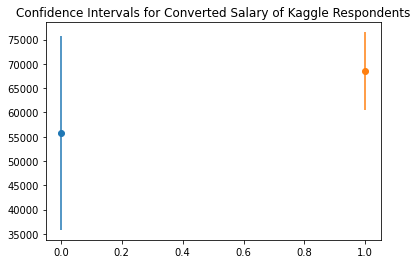

In [96]:
plt.errorbar(0, CI_sm[1], yerr=CI_sm[3], fmt='o')
plt.errorbar(1, CI_lg[1], yerr=CI_lg[3], fmt='o')
plt.title('Confidence Intervals for Converted Salary of Kaggle Respondents')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

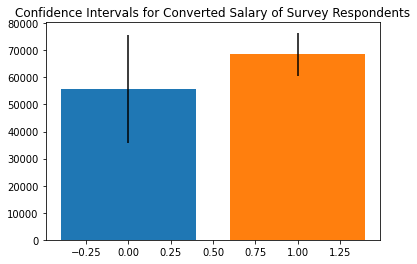

In [97]:
plt.bar(0, height=CI_sm[1], yerr=CI_sm[3])
plt.bar(1, height=CI_lg[1], yerr=CI_lg[3])
plt.title('Confidence Intervals for Converted Salary of Survey Respondents')
plt.show()

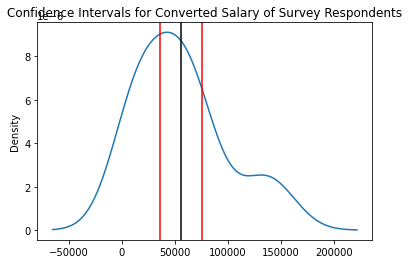

In [99]:
# The confidence interval DOES NOT capture 95% of the data from the sample
# The confidence interval captures 95% of Sample Means 
# (potential locations for the population value)

bootcampers_small['ConvertedSalary'].plot.density()
plt.title('Confidence Intervals for Converted Salary of Survey Respondents')
plt.axvline(x=CI_sm[0], color='red')
plt.axvline(x=CI_sm[1], color='black')
plt.axvline(x=CI_sm[2], color='red')
plt.show()

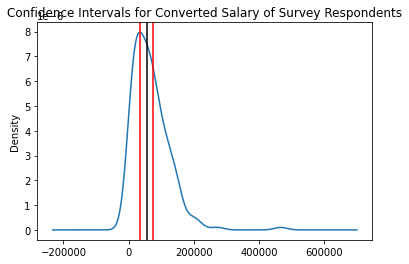

In [100]:
bootcampers_large['ConvertedSalary'].plot.density()
plt.title('Confidence Intervals for Converted Salary of Survey Respondents')
plt.axvline(x=CI_sm[0], color='red')
plt.axvline(x=CI_sm[1], color='black')
plt.axvline(x=CI_sm[2], color='red')
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [102]:
CI_pop = confidence_interval(bootcampers['ConvertedSalary'])
CI_pop

# 3.7 x's more precise than large sample; 9.2 x's more precise than small
# sample... based on moe

(71299.82986224785, 73453.40420137631, 75606.97854050477, 2153.574339128457)

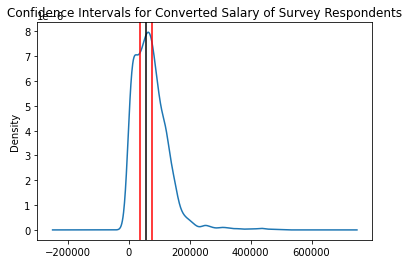

In [103]:
bootcampers['ConvertedSalary'].plot.density()
plt.title('Confidence Intervals for Converted Salary of Survey Respondents')
plt.axvline(x=CI_sm[0], color='red')
plt.axvline(x=CI_sm[1], color='black')
plt.axvline(x=CI_sm[2], color='red')
plt.show()

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision refers to the closeness of two or more measurements to each other. If you weigh a given substance five times, and get 3.2 kg each time, then your measurement is very precise. Precision is independent of accuracy. You can be very precise but inaccurate. 
The accuracy of statistical information is the degree to which the information correctly describes the phenomena it was designed to measure. It is usually characterized in terms of error in statistical estimates and is traditionally decomposed into bias (systematic error) and variance (random error) components.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

When we say we hare a 95% confidence interval we are saying that the true population parameter is between the lower and upper calculated values. A 95% CI for a population parameter DOES NOT mean that the interval has a probability of 0.95 that the true value of the parameter falls in the interval.

If repeated samples were taken and the 95% confidence interval was computed for each sample, 95% of the intervals would contain the population mean. A 95% confidence interval has a 0.95 probability of containing the population mean. 95% of the population distribution is contained in the confidence interval.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.